# Abgabe 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

2. kumulative Histogramm eines 8-Bit Graustufenbildes

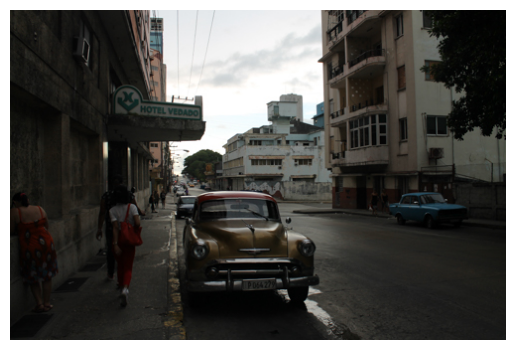

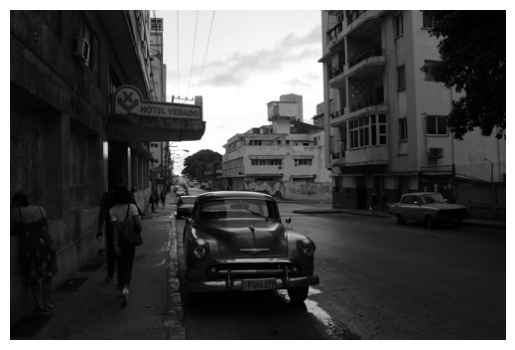

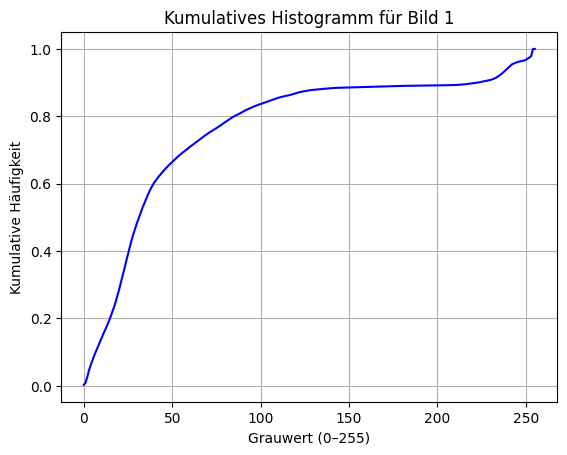

In [16]:
#load images
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg')):
        img = io.imread(file)
        images.append(img)

plt.imshow(images[0])
plt.axis('off') 
plt.show()

#convert to gray image 
def gray_converter(image):
    gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
    gray_image = gray_image.astype('uint8')
    return gray_image

gray_image = gray_converter(images[0])
plt.imshow(gray_image, cmap='gray')
plt.axis('off') 
plt.show()

#calculate cumulative histogram
def compute_cumHisto(image):
    histogram = np.zeros(256, dtype=int)

    for line in image:
        for pixel in line:
            histogram[pixel] += 1

    cumHisto = np.zeros(256, dtype=int)
    cumHisto[0] = histogram[0] #smallest value

    for i in range(1, 256):
        cumHisto[i] = cumHisto[i - 1] + histogram[i]

    return cumHisto

cumHisto_img1 = compute_cumHisto(gray_image)
cumHisto_img1 = cumHisto_img1 / cumHisto_img1[-1] #normalized

plt.plot(range(256), cumHisto_img1, color='blue')
plt.title("Kumulatives Histogramm für Bild 1")
plt.xlabel("Grauwert (0–255)")
plt.ylabel("Kumulative Häufigkeit")
plt.grid(True)
plt.show()



3. a) Was ist eine homogene und was eine nicht-homogene Punktoperation?
- `homogene Punktoperation`: wenn die Funktion unabhängig von den Bildkoordinaten/ -position angewendet wird und der Pixelwert nur vom eigenen Wert des Pixels abhängt
    zB. Änderung von Kontrast und Helligkeit, Invertieren von Bildern, Farbtransformation
    
- `nicht-homogene Punktoperation`: Transformation, bei der der Pixelwert auch von der Position im Bild oder von benachbarten Pixeln abhängt

    b) Was ist der Unterschied zwischen Punktoperationen und Filteroperationen?
- `Punktoperation`: Operationen auf Bildern, die nur die Werte der einzelnen Bildelemente betreffen, hierbei ist jeder neue Pixel vom ursprünglichen abhängig
- `Filteroperation`: Operation, bei dem der Pixelwert durch eine Gewichtung der benachbarten Pixel berechnet wird (Pixel abhängig von benachbarten Pixel)

4. Histogrammanpassung

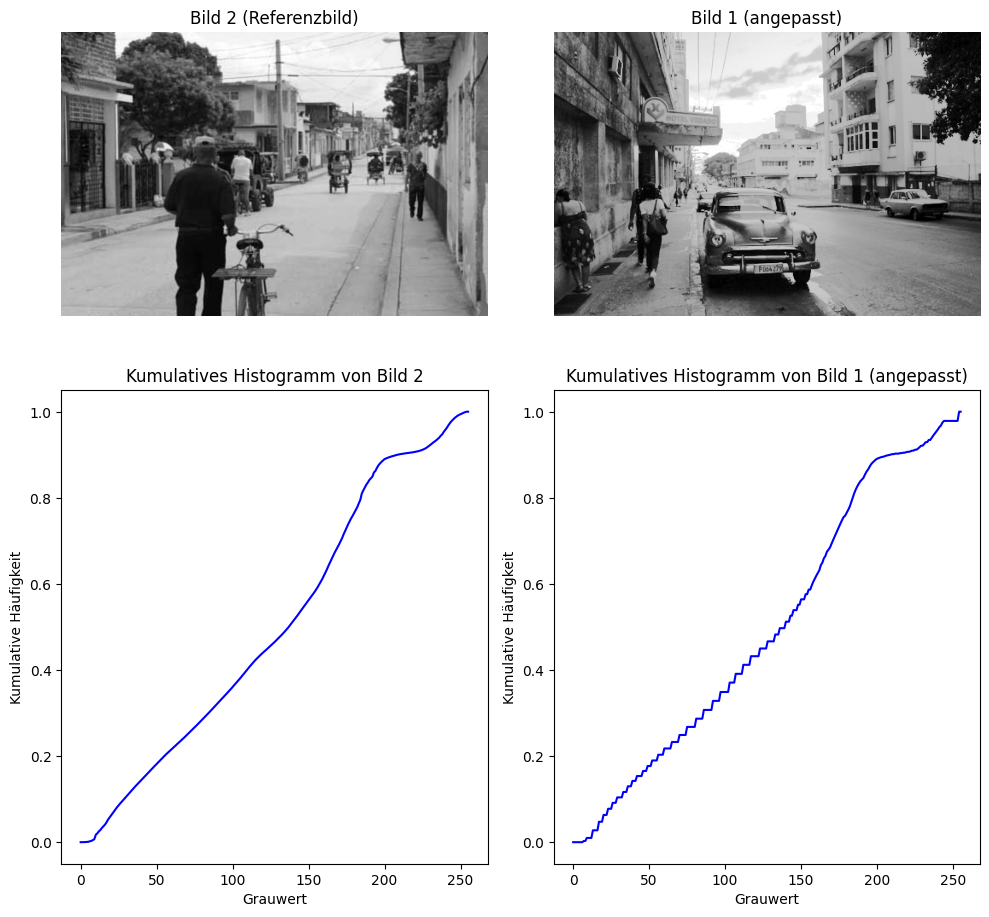

In [15]:
#cumulative histogram for image 2 

gray_img1 = gray_converter(images[0]) #img 1
gray_img2 = gray_converter(images[1]) #img 2

img_histo = compute_cumHisto(gray_img1) #img 1
ref_histo = compute_cumHisto(gray_img2) #img 2

#normalization
img_histo = img_histo / img_histo[-1]
ref_histo = ref_histo / ref_histo[-1]

def match_Histo(img_histo, ref_histo):
    LUT = np.zeros(256, dtype=int)
    for i in range(256):
        idx = np.abs(ref_histo - img_histo[i]).argmin() #find min difference
        LUT[i] = idx

    return LUT

LUT = match_Histo(img_histo, ref_histo)
matched_img1 = LUT[gray_img1]

matched_histo = compute_cumHisto(matched_img1)
matched_histo = matched_histo / matched_histo[-1]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(gray_img2, cmap='gray')
axs[0, 0].set_title("Bild 2 (Referenzbild)")
axs[0, 0].axis('off')

axs[0, 1].imshow(matched_img1, cmap='gray')
axs[0, 1].set_title("Bild 1 (angepasst)")
axs[0, 1].axis('off')

axs[1, 0].plot(range(256), ref_histo, color='blue')
axs[1, 0].set_title("Kumulatives Histogramm von Bild 2")
axs[1, 0].set_xlabel("Grauwert")
axs[1, 0].set_ylabel("Kumulative Häufigkeit")

axs[1, 1].plot(range(256), matched_histo, color='blue')
axs[1, 1].set_title("Kumulatives Histogramm von Bild 1 (angepasst)")
axs[1, 1].set_xlabel("Grauwert")
axs[1, 1].set_ylabel("Kumulative Häufigkeit")

plt.tight_layout()
plt.show()


Wieso mussen die beiden Histogramme des Referenz- und des Orginalbildes normiert
sein? (Denken Sie an den Histogrammausgleich)

- Histogramme müssen normiert sein, damit die kumulierten Werte beider Bilder auf derselben Skala (0 bis 1) liegen
- die Häufigkeiten der Graustufen können unabhängig von der Bildgröße verglichen werden --> somit wird der Histogrammausgleich korrekt durchgeführt